In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
def load_data():
    data_dir = './data'
    train_features_csv = f'{data_dir}/dengue_features_train.csv'
    train_labels_csv = f'{data_dir}/dengue_labels_train.csv'
    test_features_csv = f'{data_dir}/dengue_features_test.csv'
    
    train_features_df = pd.read_csv(train_features_csv)
    train_labels_df = pd.read_csv(train_labels_csv)
    test_features_df = pd.read_csv(test_features_csv)
   
    train_df = train_features_df.merge(train_labels_df, left_on=['city', 'year', 'weekofyear'], right_on=['city', 'year', 'weekofyear'])
    
    print(f'length train feature: {len(train_features_df)}')
    print(f'length train labels: {len(train_labels_df)}')
    print(f'length test feature: {len(test_features_df)}')
    print(f'length train merge: {len(train_df)}')
    
    return train_df, test_features_df

In [56]:
train_df, test_df = load_data()

length train feature: 1456
length train labels: 1456
length test feature: 416
length train merge: 1456


In [57]:
print(f'train set: {train_df.shape}')
print(f'test set: {test_df.shape}')

train set: (1456, 25)
test set: (416, 24)


In [58]:
train_df.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


In [93]:
print(train_df.groupby(by=['city','year']).size())
print(test_df.groupby(['city', 'year']).size())

city  year
iq    2000    26
      2001    52
      2002    52
      2003    52
      2004    52
      2005    52
      2006    52
      2007    52
      2008    52
      2009    52
      2010    26
sj    1990    35
      1991    52
      1992    52
      1993    52
      1994    52
      1995    52
      1996    52
      1997    52
      1998    52
      1999    52
      2000    52
      2001    52
      2002    52
      2003    52
      2004    52
      2005    52
      2006    52
      2007    52
      2008    17
dtype: int64
city  year
iq    2010    26
      2011    52
      2012    52
      2013    26
sj    2008    35
      2009    52
      2010    52
      2011    52
      2012    52
      2013    17
dtype: int64


In [98]:
print(train_df.groupby(by=['city']).size())
print(test_df.groupby(by=['city']).size())

city
iq    520
sj    936
dtype: int64
city
iq    156
sj    260
dtype: int64


In [60]:
pd.concat([pd.Series(train_df.isna().sum(), name='NAN'), pd.Series(train_df.count(), name='OK')], axis=1)

,NAN,OK
city,0,1456
year,0,1456
weekofyear,0,1456
week_start_date,0,1456
ndvi_ne,194,1262
ndvi_nw,52,1404
ndvi_se,22,1434
ndvi_sw,22,1434
precipitation_amt_mm,13,1443
reanalysis_air_temp_k,10,1446


In [61]:
train_df.week_start_date = pd.to_datetime(train_df.week_start_date)

In [62]:
sum((train_df.week_start_date.dt.weekofyear!=train_df.weekofyear) | (train_df.week_start_date.dt.year!=train_df.year))

0

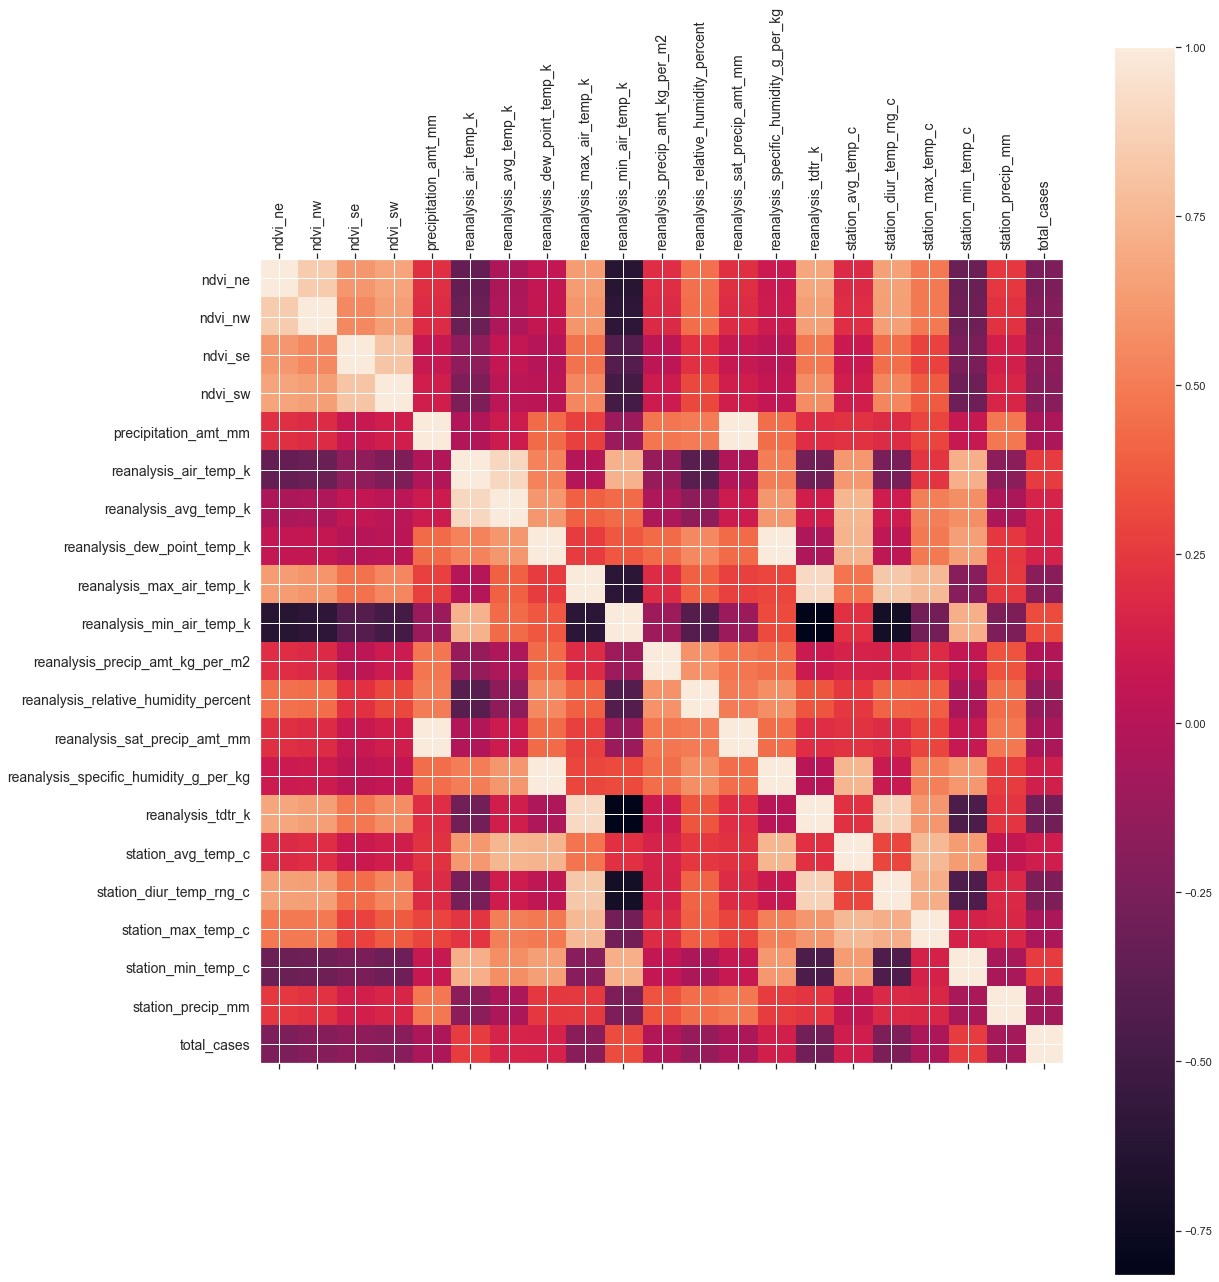

In [63]:
f = plt.figure(figsize=(18, 22))
sns.set()
train_df_corr = train_df.drop(columns=['city', 'year', 'weekofyear', 'week_start_date']).corr()
plt.matshow(train_df_corr, fignum=f.number)
plt.xticks(range(train_df_corr.shape[1]), train_df_corr.columns, fontsize=14, rotation=90)
plt.yticks(range(train_df_corr.shape[1]), train_df_corr.columns, fontsize=14)
cb = plt.colorbar()

In [75]:
train_df.set_index(['city', 'week_start_date'], inplace=True)

In [77]:
corr_city = pd.DataFrame({'iq_total':train_df.loc['iq'].corr().total_cases, 'sj_total': train_df.loc['sj'].corr().total_cases})
corr_city['diff_percent'] = abs(100*(corr_city.iq_total.abs() - corr_city.sj_total.abs()) / corr_city.iq_total)
corr_city.sort_values(by='iq_total', ascending=False)


,iq_total,sj_total,diff_percent
total_cases,1.000000,1.000000,0.000000
reanalysis_specific_humidity_g_per_kg,0.236476,0.207947,12.064073
reanalysis_dew_point_temp_k,0.230401,0.203774,11.556861
reanalysis_min_air_temp_k,0.214514,0.187943,12.386636
station_min_temp_c,0.211702,0.177012,16.386412
year,0.179451,-0.212690,18.522403
reanalysis_relative_humidity_percent,0.130083,0.144045,10.733139
station_avg_temp_c,0.113070,0.196617,73.889593
reanalysis_precip_amt_kg_per_m2,0.101171,0.107457,6.213098
reanalysis_air_temp_k,0.097098,0.181917,87.354369


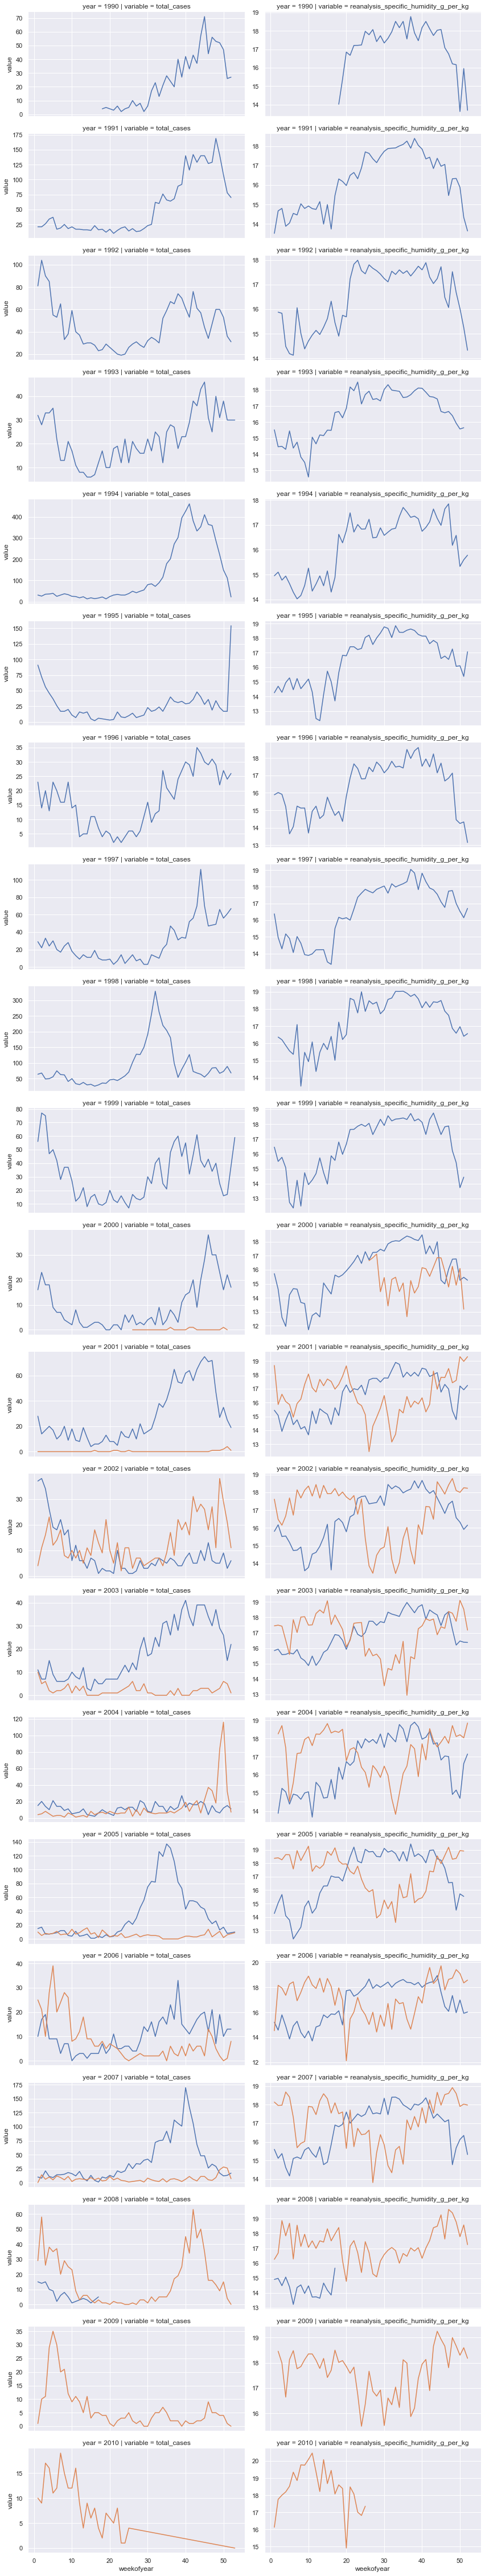

In [84]:
plot_df = train_df.reset_index(level=0).sort_values(by=['year', 'weekofyear'])
plot_df = pd.melt(plot_df, id_vars=['year', 'weekofyear', 'city'], value_vars=['total_cases', 'reanalysis_specific_humidity_g_per_kg'])

g = sns.FacetGrid(plot_df, col='variable', row='year', hue='city',  sharey=False, legend_out=True, aspect=2)
g.map(plt.plot, 'weekofyear', 'value')


In [85]:
test_df.set_index(['city', 'week_start_date'], inplace=True)

city  year
iq    2010    26
      2011    52
      2012    52
      2013    26
sj    2008    35
      2009    52
      2010    52
      2011    52
      2012    52
      2013    17
dtype: int64